# Data Augmentation

In [1]:
from PIL import Image
import albumentations as A
import nlpaug.augmenter.word as naw
import numpy as np
import matplotlib.pyplot as plt

## Image Data Augmentation

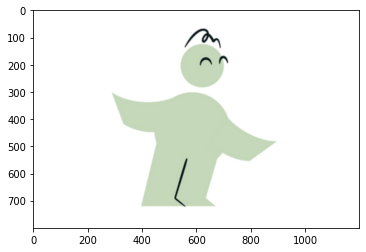

In [2]:
data  = Image.open("example.png")
plt.imshow(data)
plt.savefig('original.png')
plt.show()

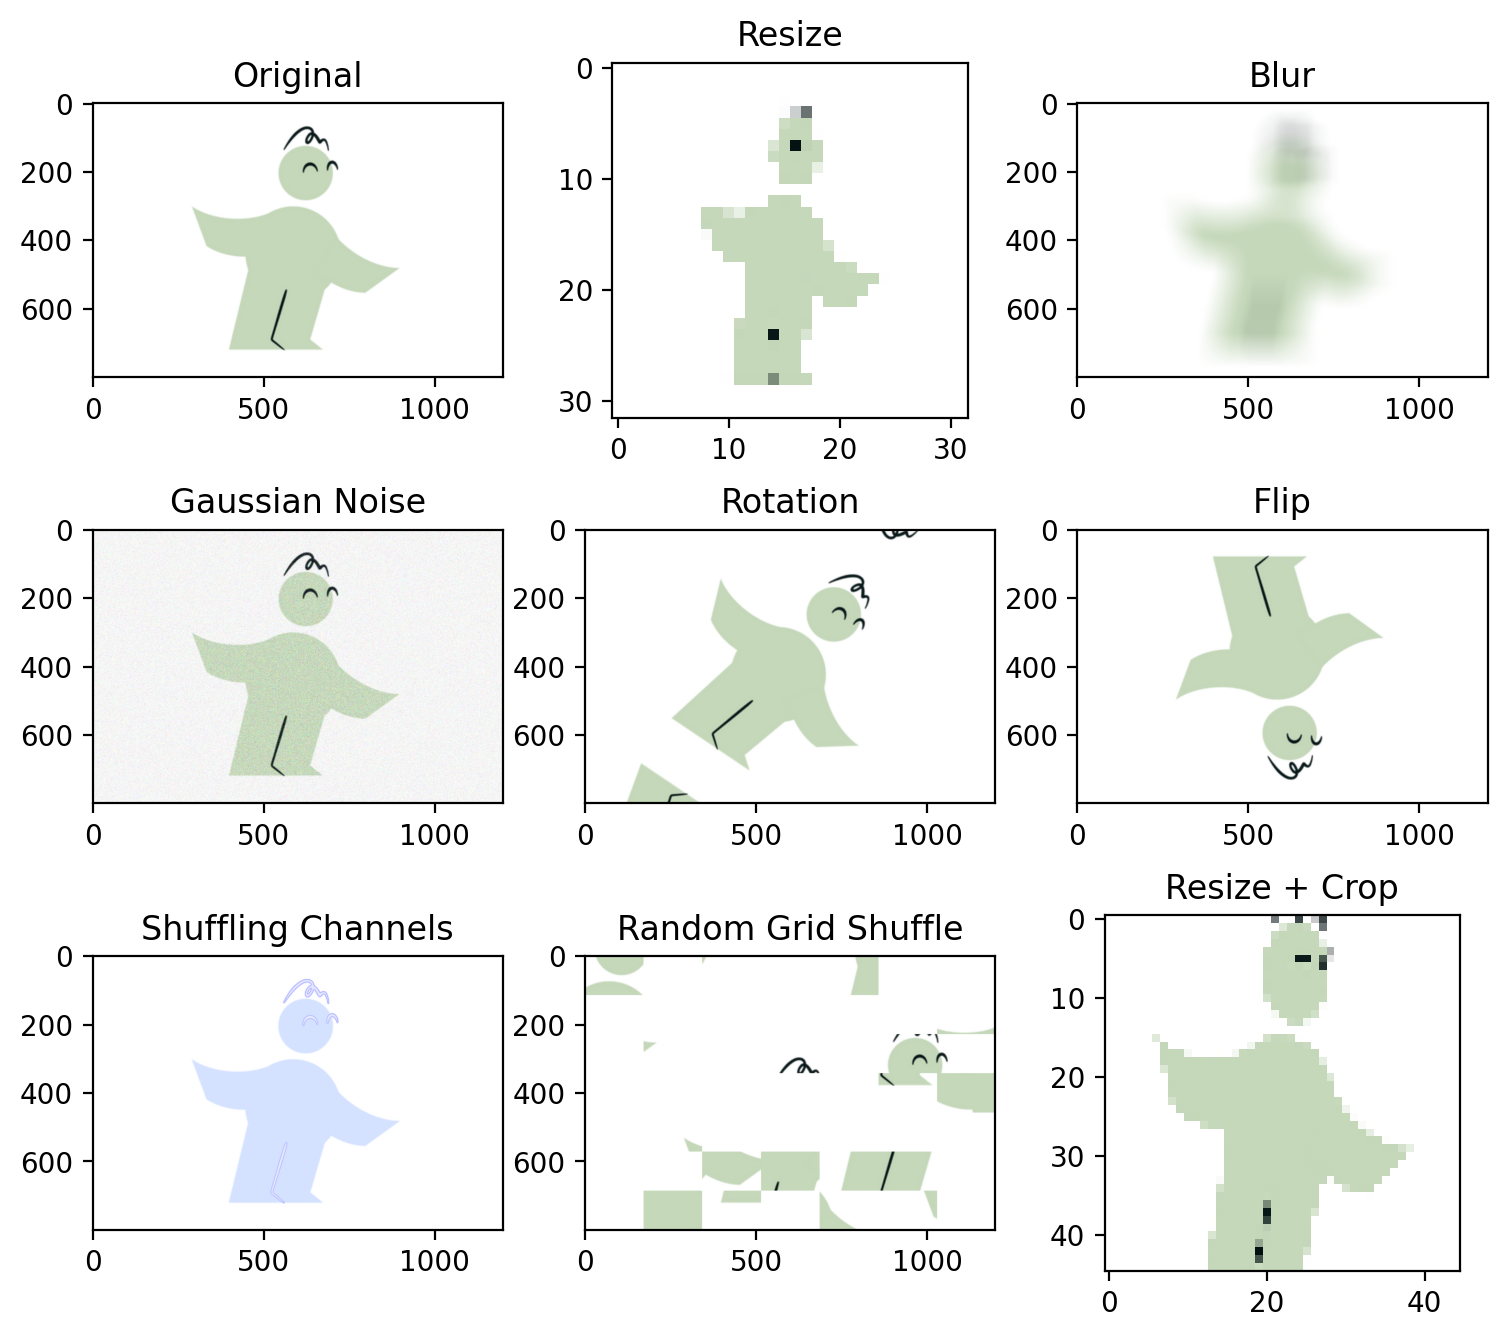

In [3]:
image = np.array(data)
images = [data,
          A.Resize(width=32, height=32)(image=image)['image'],
          A.Blur(blur_limit=(100, 100), p=1)(image=image)['image'],
          A.GaussNoise(var_limit=650.0, p=1.0)(image=image)['image'],
          A.Rotate()(image=image)['image'],
          A.Flip(p=1)(image=image)['image'],
          A.ChannelShuffle(p=1)(image=image)['image'],
          A.RandomGridShuffle(grid=(7, 7), p=1)(image=image)['image'],
          A.Compose([
                A.Resize(width=64, height=64),
                A.CenterCrop(width=45, height=45)
          ])(image=image)['image']]

titles=["Original", "Resize", "Blur", 
        "Gaussian Noise", "Rotation", "Flip",
        "Shuffling Channels", "Random Grid Shuffle",
        "Resize + Crop"]

plt.figure(figsize=(9, 8), dpi=200)
for num, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(len(images)//3, len(images)//3, num+1)
    plt.title(title)
    plt.imshow(img)
plt.savefig('augmented.png')

## Text Data Augmentation

Original Phrase: "It is prohibited to eat frozen yogurt on the way to work"

### Word Level Augmentation

In [4]:
text = "It is prohibited to eat frozen yogurt on the way to work"
aug = naw.SynonymAug(aug_p=0.3)
aug.augment(text)

['Information technology is prohibited to run through frozen yoghourt on the room to work']

In [5]:
aug = naw.AntonymAug(aug_p=0.5)
aug.augment(text)

['It differ permit to eat unfrozen yogurt on the way to idle']

In [6]:
aug = naw.random.RandomWordAug(action='swap', aug_p=0.5)
aug.augment(text)

['Prohibited it is to frozen eat on way yogurt the to work']

In [7]:
aug = naw.SpellingAug(aug_p=0.5)
aug.augment(text)

['It 1s prohobited lo eight frozen yogurt on tht wat to work']

### Flow Augmentation

In [8]:
aug = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")
aug.augment(text)

['additionally it specifically is prohibited only to eat strictly frozen soy yogurt on the way to work']